In [1]:
import numpy as np # Numpy numerical computing library
import pandas as pd # Pandas data science library
import requests # requests library for HTTP requests in Python
import datetime # datetime provides date information 
import matplotlib.pyplot as plt # pyplot plot data
import random # Generate random number
import math # Math provide access to equations

In [2]:
stocks = pd.read_csv('Stocks in the SP 500 Index.csv')
stocks = stocks.drop(2)
stocks.reset_index(drop=True)

,Symbol,Description,Category2,Category3,GICS Sector,Market cap,Dividend yield,Price to TTM earnings,Price to TTM sales,Price to book value,Action
0,AAPL,Apple Inc,Common stocks,Large cap,Information Technology,"$2,205,660,560,700",0.65%,21.67,5.71,32.78,Analyze
1,MSFT,Microsoft Corp,Common stocks,Large cap,Information Technology,"$1,597,120,871,102",1.15%,22.04,8.29,9.80,Analyze
2,GOOGL,Alphabet Inc Class A,Common stocks,Large cap,Communication Services,"$1,006,447,530,000",0.00%,6.69,3.72,1.96,Analyze
3,AMZN,Amazon.Com Inc.,Common stocks,Large cap,Consumer Discretionary,"$911,007,717,917",0.00%,42.54,1.91,6.80,Analyze
4,TSLA,Tesla Inc,Common stocks,Large cap,Consumer Discretionary,"$674,667,435,389",0.00%,77.40,10.85,19.07,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
497,NWL,Newell Brands Inc,Common stocks,Mid cap,Consumer Discretionary,"$5,256,856,000",7.12%,7.33,0.49,1.32,Analyze
498,VNO,Vornado Realty Trust,REITs,Mid cap,Real Estate,"$4,344,647,893",9.13%,29.72,2.63,0.72,Analyze
499,RL,Ralph Lauren Corp Class A,Common stocks,Mid cap,Consumer Discretionary,"$4,065,887,356",3.13%,8.50,0.68,1.57,Analyze
500,DISH,Dish Network Corp Class A,Common stocks,Mid cap,Communication Services,"$4,009,957,969",0.00%,1.81,0.23,0.25,Analyze


In [3]:
portfolio_size = 3
portfolio_symbols = []

for i in range(portfolio_size):
    symbol = stocks.iloc[i, 0]
    portfolio_symbols.append(symbol)

portfolio_df = pd.DataFrame()

In [4]:
time_len = 1000

for i in range(portfolio_size):
     
    symbol = portfolio_symbols[i]
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&outputsize=full&apikey=NMDP5PAY7P2NCZJO'
    r = requests.get(url)
    data = r.json()
    
    time_key = datetime.date.today()
    time_count = 0

    cur_env = []
    
    while time_count < time_len:
        try:
            day_close = data['Time Series (Daily)'][time_key.strftime("%Y-%m-%d")]['5. adjusted close']
            cur_env.append(float(day_close))
            time_count += 1
        except:
            pass
        time_key = time_key - datetime.timedelta(days=1)
        
    cur_env.reverse()
    portfolio_df[portfolio_symbols[i]] = cur_env

portfolio_df

,AAPL,MSFT,GOOGL
0,40.687040,104.011117,53.0825
1,40.800441,104.480455,53.6865
2,41.246809,104.834854,53.6770
3,39.927008,101.559064,52.5855
4,39.555437,98.551467,51.2825
...,...,...,...
995,150.180000,245.030000,97.0500
996,151.070000,247.580000,98.4600
997,148.110000,247.490000,97.4600
998,144.220000,241.760000,96.0500


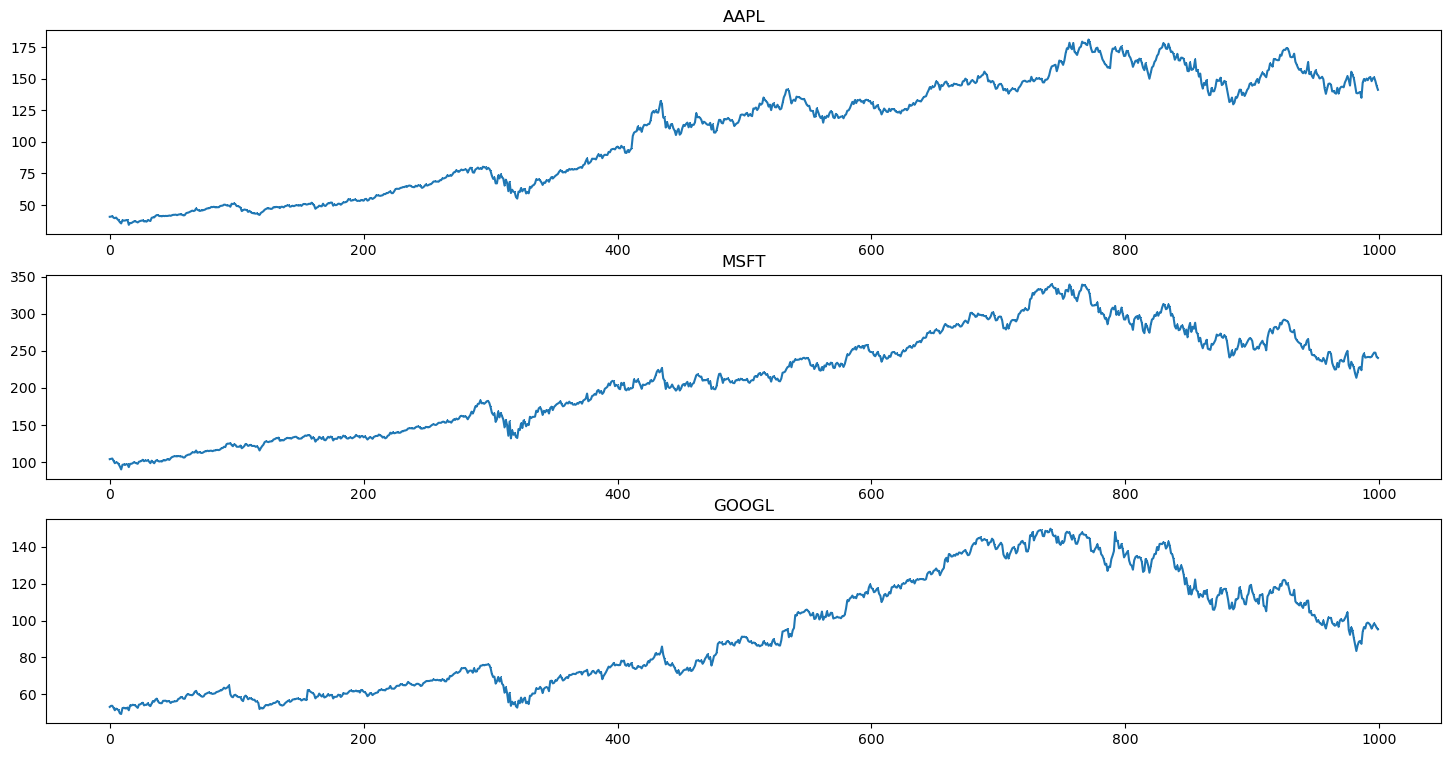

In [5]:
fig, ax = plt.subplots(nrows=portfolio_size, ncols=1, figsize=(18, portfolio_size*3))

for i in range(portfolio_size):
    
    y = portfolio_df[portfolio_symbols[i]]
    x = list(range(0, time_len))
    ax[i].plot(x, y, label=portfolio_symbols[i], marker=",")
    ax[i].title.set_text(f'{portfolio_symbols[i]}')
    # ax[i].title(f'{portfolio_symbols[i]} Environment {time_len} day', fontsize=14)
    # ax[i].xlabel('Day', fontsize=14)
    # ax[i].ylabel('Daily Close', fontsize=14)
    # ax[i].grid(True)
plt.show()

In [6]:
def bot_random(env, cash):
    
    time_len = len(env)
    my_money = cash
    my_volume = 0
    report = []
    
    for t in range(time_len):      
        
        # Sell all on last day
        if t == time_len - 1:
            my_money += my_volume * env[t]
            my_volume -= my_volume
            report.append([t, env[t], 2, round(my_money, 2), my_volume]) 
            break
        
        action = random.randrange(3)
        
        if action == 0:
            continue
        
        elif action == 1 and my_money > env[t]:
            cur_volume = math.floor(my_money / env[t])
            my_volume += cur_volume
            my_money -= cur_volume * env[t]
            report.append([t, env[t], action, round(my_money, 2), my_volume])
        
        elif action == 2 and my_volume > 0:
            my_money += my_volume * env[t]
            my_volume -= my_volume
            report.append([t, env[t], action, round(my_money, 2), my_volume])    
            
    return report, my_money

In [7]:
def bot_policy_0(env, cash):
    
    time_len = len(env)
    my_money = cash
    my_volume = 0
    report = [[0, env[0], 0, my_money, my_volume]]
    act_count = 0
    
    for t in range(2, time_len):      
        
        # Sell all on last day
        if t == time_len - 1:
            my_money += my_volume * env[t]
            my_volume -= my_volume
            report.append([t, env[t], 2, round(my_money, 2), my_volume]) 
            break
        
        action = 0
        if action == 0:
            report.append([t, env[t], action, round(my_money, 2), my_volume]) 
        
        if (env[t] > env[t-1]) and (env[t-1] > env[t-2]) and (report[act_count][2] != 1):
            action = 1
            
        if (env[t] < env[t-1]) and (report[act_count][2] == 1) and (report[act_count][1] < .95 * env[t]):
            action = 2
        
        if action == 1:
            cur_volume = math.floor(my_money / env[t])
            my_volume += cur_volume
            my_money -= cur_volume * env[t]
            report.append([t, env[t], action, round(my_money, 2), my_volume])
            act_count += 1
        
        elif action == 2:
            my_money += my_volume * env[t]
            my_volume -= my_volume
            report.append([t, env[t], action, round(my_money, 2), my_volume])   
            act_count += 1
            
    return report, my_money, act_count

In [8]:
cash = 1000000
test = 10000

for i in range(portfolio_size):
    
    count = 0
    avg = 0
    env = portfolio_df[portfolio_symbols[i]].values.tolist()
    for j in range(test):
        report,result = bot_random(env, cash)
        if result > cash: 
            count += 1
        avg += result

    passive_momentum = round((env[-1] - env[0]) / env[0] * 100, 2)
    positive_rate = round(count/test*100, 2)
    avg = round(avg / test, 2)
    avg_momentum = round((avg - cash) / cash * 100, 2)

    report_0 = f"{portfolio_symbols[i]} passive momentum: {passive_momentum}%"
    report_1 = f"Bot's positive result rate: {positive_rate}%"
    report_2 = f"Bot's avg momentum: {avg_momentum}%"

    # print(report_0)   
    # print(report_1)
    # print(report_2)
    # print()
    
    report[]

AAPL passive momentum: 246.97%
Bot's positive result rate: 96.74%
Bot's avg momentum: 95.23%

MSFT passive momentum: 131.06%
Bot's positive result rate: 92.53%
Bot's avg momentum: 59.58%

GOOGL passive momentum: 79.32%
Bot's positive result rate: 82.96%
Bot's avg momentum: 40.37%



In [9]:
cash = 1000000

for i in range(portfolio_size):
    
    count = 0
    avg = 0
    env = portfolio_df[portfolio_symbols[i]].values.tolist()
    
    report,result,act_count = bot_policy_0(env, cash)

    passive_momentum = round((env[-1] - env[0]) / env[0] * 100, 2)
    result_momentum = round((result - cash) / cash * 100, 2)

    report_0 = f"{portfolio_symbols[i]} passive momentum: {passive_momentum}%"
    report_1 = f"Bot's avg momentum: {result_momentum}%"

    print(report_0)   
    print(report_1)
    print()
    
    if (result_momentum < 0):
        print(report)
        print(act_count)
        print()

AAPL passive momentum: 246.97%
Bot's avg momentum: 165.45%

MSFT passive momentum: 131.06%
Bot's avg momentum: 76.67%

GOOGL passive momentum: 79.32%
Bot's avg momentum: 46.37%



In [26]:
def policy_tabular(env, cash):
    
    time_len = len(env)
    policy = [0]
    table = [cash]
    
    for state in range(1, time_len):
            
        if env[state-1] > env[state-2]:
            state_cal = env[state] / env[state-1]
            table.append(table[state-1] * state_cal)
            policy.append(1)
        else:
            table.append(table[state-1])
            policy.append(0)   
            
    return table

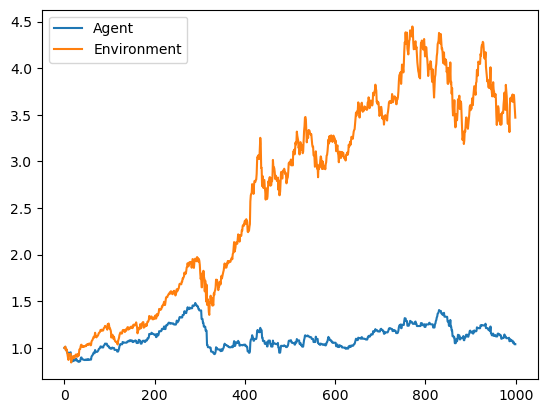

AAPL passive momentum: 246.97%
Bot's avg momentum: 3.9%



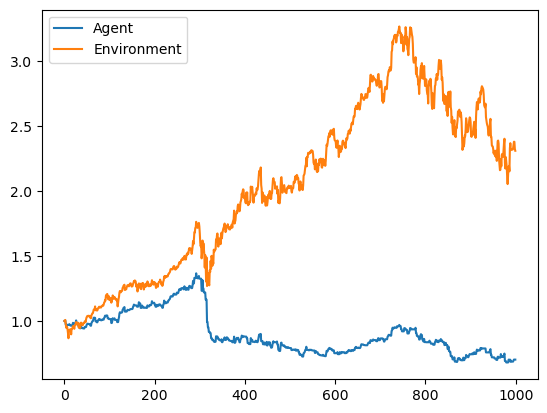

MSFT passive momentum: 131.06%
Bot's avg momentum: -29.76%



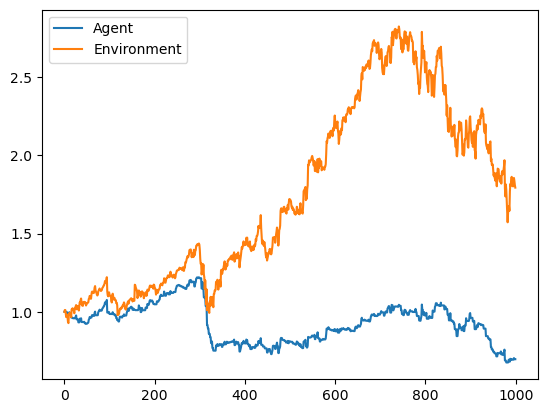

GOOGL passive momentum: 79.32%
Bot's avg momentum: -30.29%



In [29]:
cash = 1000000

for i in range(portfolio_size):
    
    count = 0
    env = portfolio_df[portfolio_symbols[i]].values.tolist()
    
    result = policy_tabular(env, cash)

    passive_momentum = round((env[-1] - env[0]) / env[0] * 100, 2)
    result_momentum = round((result[-1] - cash) / cash * 100, 2)

    report_0 = f"{portfolio_symbols[i]} passive momentum: {passive_momentum}%"
    report_1 = f"Bot's avg momentum: {result_momentum}%"
    
    
    # result = []
    # for i in range(len(env)):
    #     result.append(env[i]*report[4] + report[3])
    
    x = np.arange(0, len(env))
    temp = env[0]
    for i in range(len(env)):
        result[i] = result[i] / cash
        env[i] = env[i] / temp
        
    plt.plot(x, result, label = "Agent")
    plt.plot(x, env, label = "Environment")
    plt.legend()
    plt.show()
    
    print(report_0)   
    print(report_1)
    print()